<a href="https://www.kaggle.com/code/kapusharinka/network-anomaly-detection?scriptVersionId=171836448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv


# Network Anomaly Detection
https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques</br>
https://medium.com/@AmyGrabNGoInfo/list/imbalanced-classification-and-anomalies-detection-dc908de4382d</br>
https://youtube.com/playlist?list=PLVppujud2yJo0qnXjWVAa8h7fxbFJHtfJ&feature=shared

# Data preprocessing and overview
Dataset is taken from here: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection. It is based on [KDD-Cup '99](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Data).

In [9]:
train = pd.read_csv('/kaggle/input/network-intrusion-detection/Train_data.csv')
test = pd.read_csv('/kaggle/input/network-intrusion-detection/Test_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

## List of columns

### BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Duration: Length of time duration of the connection
1. Protocol_type: Protocol used in the connection
1. Service: Destination network service used
1. Flag: Status of the connection – Normal or Error
1. Src_bytes: Number of data bytes transferred from source to destination in single connection
1. Dst_bytes: Number of data bytes transferred from destination to source in single connection
1. Land: if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0
1. Wrong_fragment: Total number of wrong fragments in this connection
1. Urgent: Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated
### CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Hot: Number of „hot‟ indicators in the content such as: entering a system directory, creating programs and executing programs
1. Num_failed_logins: Count of failed login attempts
1. Logged_in Login Status: 1 if successfully logged in; 0 otherwise
1. Num_compromised: Number of compromised' ' conditions 
1. Root_shell: 1 if root shell is obtained; 0 otherwise 
1. Su_attempted: 1 ifsu root'' command attempted or used; 0 otherwise
1. Num_root: Number of root'' accesses or number of operations performed as a root in the connection 
1. Num_file_creations: Number of file creation operations in the connection 
1. Num_shells: Number of shell prompts 
1. Num_access_files: Number of operations on access control files 
1. Num_outbound_cmds: Number of outbound commands in an ftp session 
1. Is_hot_login: 1 if the login belongs to thehot'' list i.e., root or admin; else 0
1. Is_guest_login: 1 if the login is a guest, 0 otherwise
### TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Count: Number of connections to the same destination host as the current connection in the past two seconds
1. Srv_count: Number of connections to the same service (port number) as the current connection in th e past two seconds
1. Serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
1. Srv_serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
1. Rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)
1. Srv_rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
1. Same_srv_rate: The percentage of connections that were to the same service, among the connections aggregated in count (23)
1. Diff_srv_rate: The percentage of connections that were to different services, among the connections aggregated in count (23)
1. Srv_diff_host_ rate: The percentage of connections that were to different destination machines among the connections aggregated in srv_count (24)
### HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR
1. Dst_host_count: Number of connections having the same destination host IP address
1. Dst_host_srv_ count: Number of connections having the same port number
1. Dst_host_same srv_rate: The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32) 
1. Dst_host_diff srv_rate: The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)
1. Dst_host_same src_port_rate: The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33) 
1. Dst_host_srv diff_host_rate: The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
1. Dst_host_serro r_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_s error_rate: The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
1. Dst_host_rerro r_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_r error_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)

In [10]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


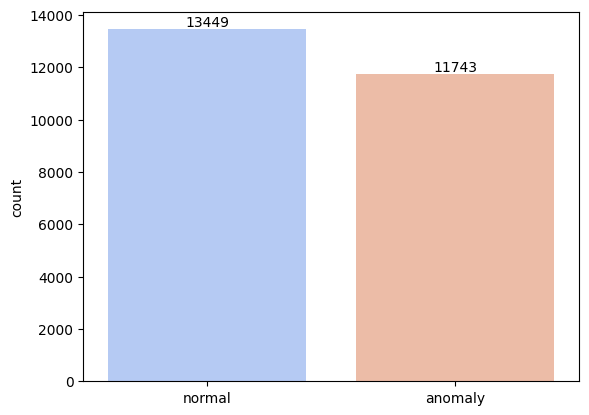

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=train["class"], palette=("coolwarm"))
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

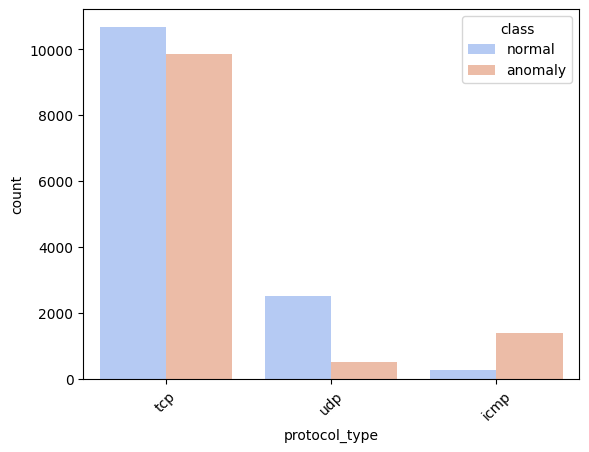

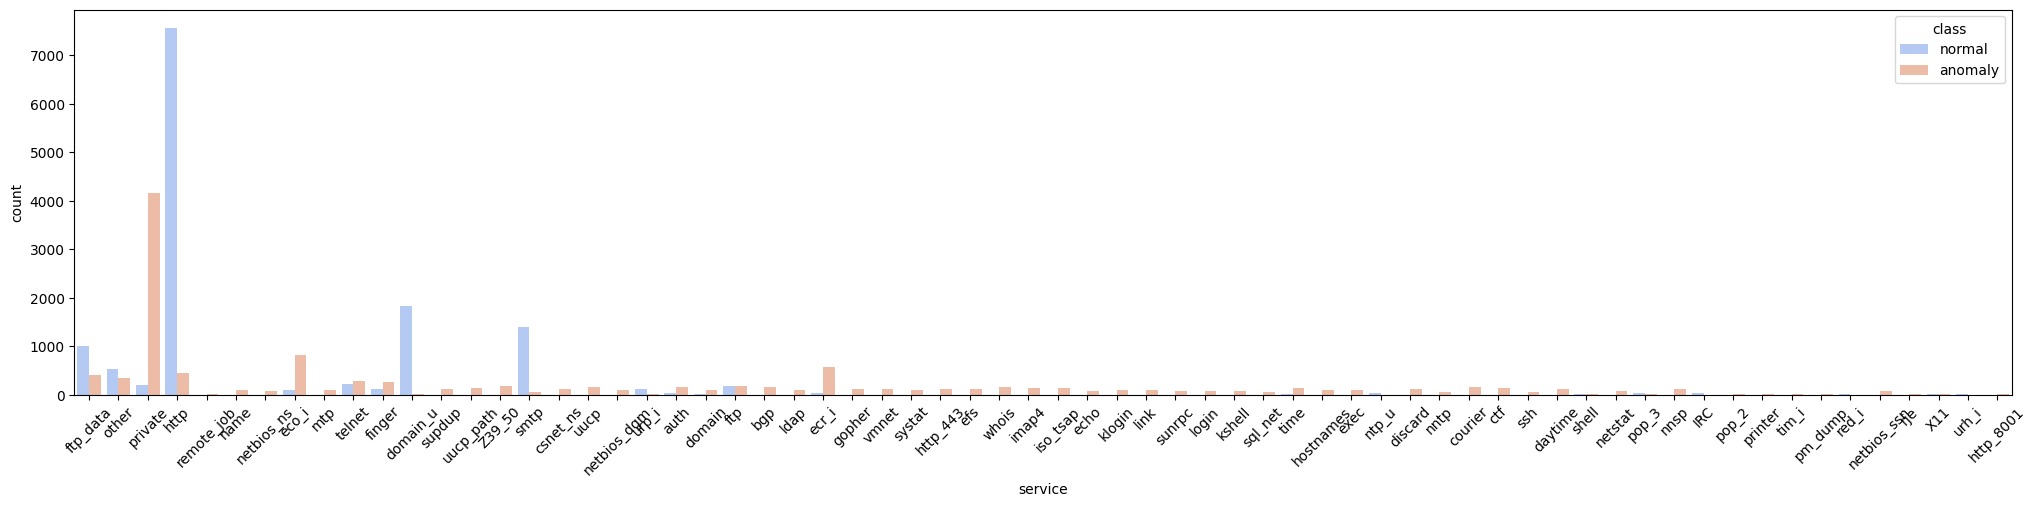

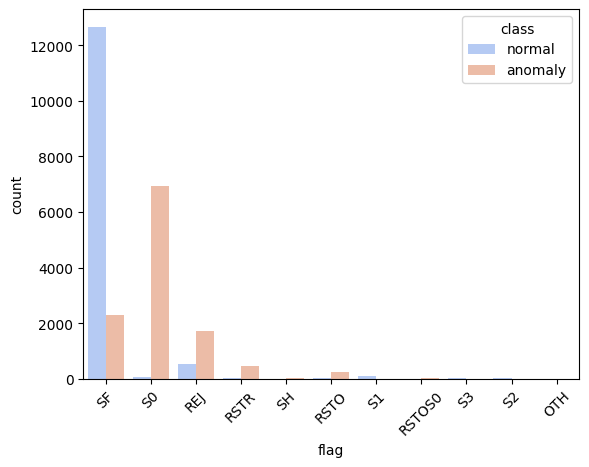

In [14]:
# categorical columns
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class', palette=("coolwarm"))
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# remove missing values (NaN)
train.dropna(inplace=True)

# duplicates
print(f"Number of duplicate rows in train set: {train.duplicated().sum()}")

Number of duplicate rows in train set: 0


## Label encoding
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [16]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


## Correlations

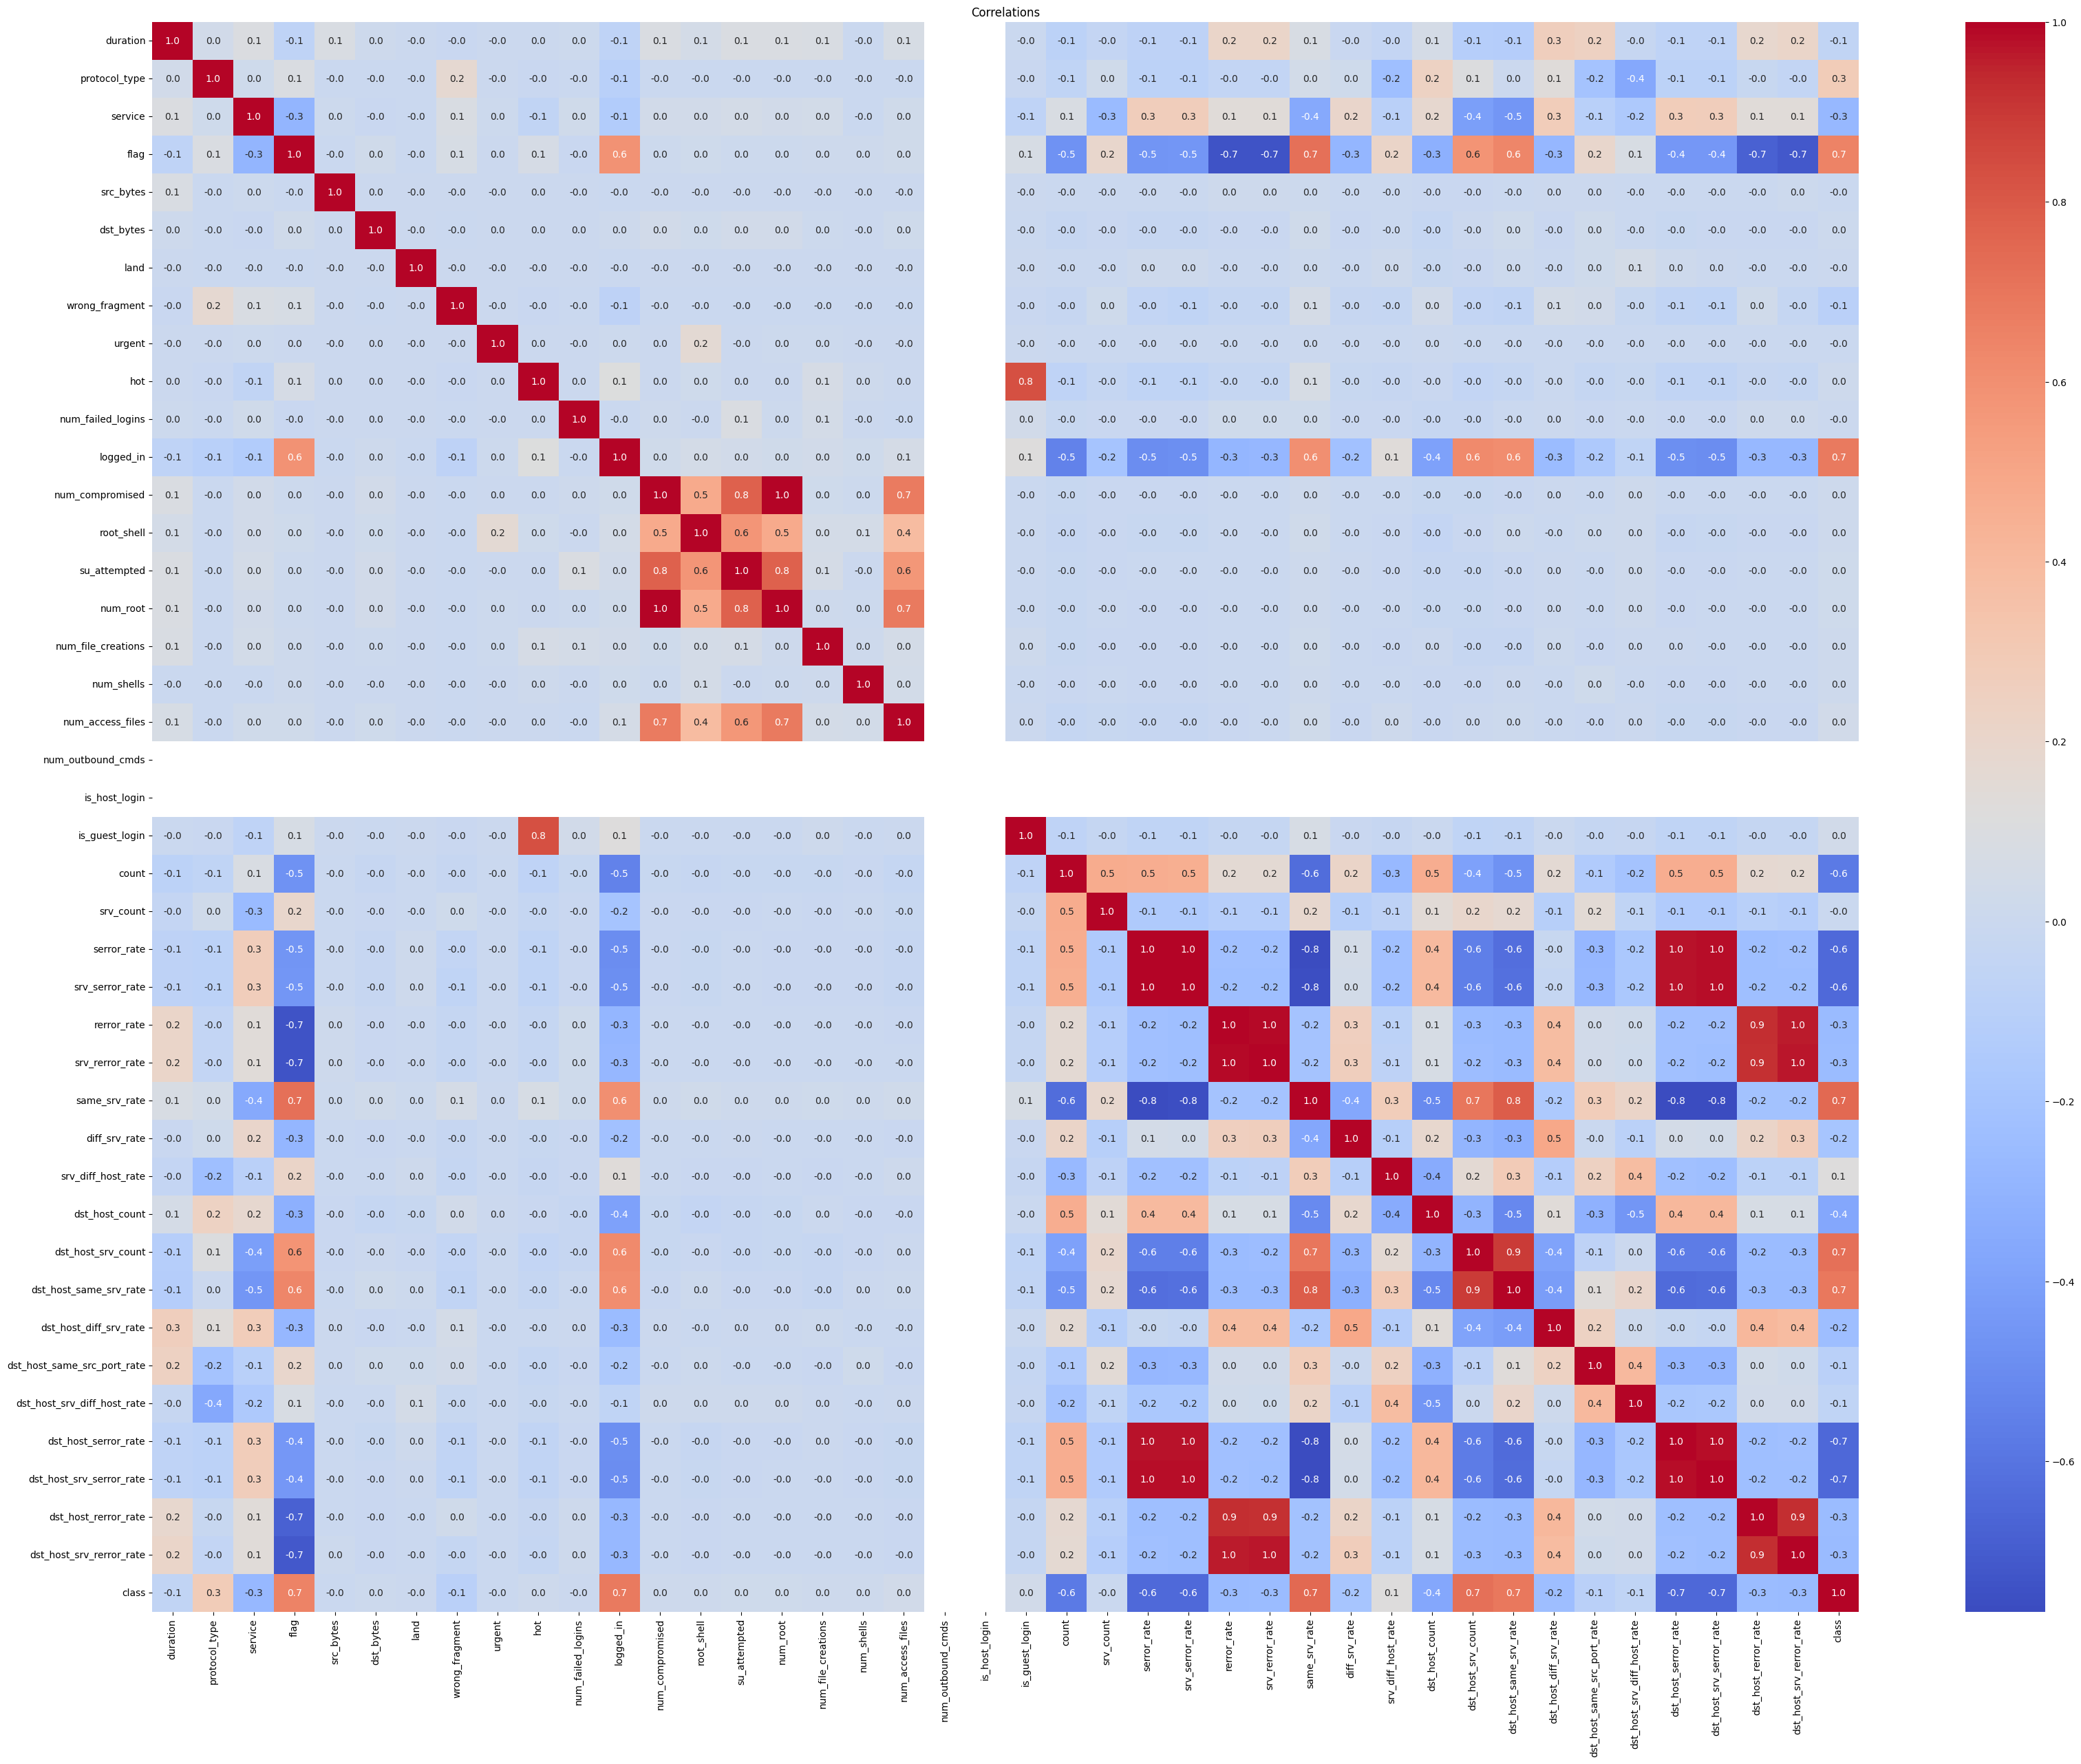

In [17]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


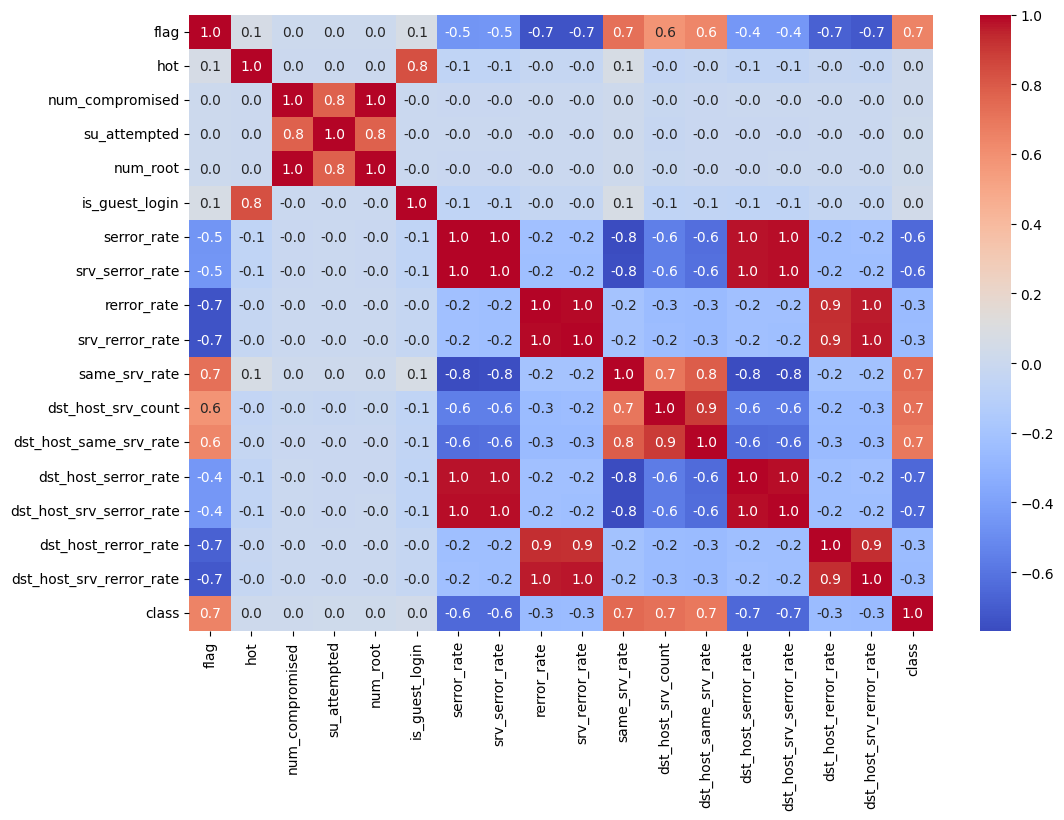

In [18]:
# only strong correlations
corr_matrix = train.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()

## Scale data
Let's use [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) since it's not so sensitive to outliers like StandardScaler and MinMaxScaler.

In [ ]:
X = train.drop(['class'], axis=1)
y = train['class']

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# printing statistics function
def print_stats(predictions, X, y, title):
    print("0 is anomaly, 1 is normal")
    print(pd.Series(predictions).value_counts())
    print(classification_report(y, predictions))

    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Anomaly', 'Normal']); 
    ax.yaxis.set_ticklabels(['Anomaly', 'Normal']);
    plt.show()

# Supervised learning

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
predictions = NB.predict(X_train)
print_stats(predictions, X_train, y_train, "Gaussian Naive Bayes on the train set")

In [ ]:
predictions = NB.predict(X_test)
print_stats(predictions, X_test, y_test, "Gaussian Naive Bayes on the test set")

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=8000)
LR.fit(X_train, y_train)
predictions = LR.predict(X_train)
print_stats(predictions, X_train, y_train, "Logistic regression on the train set")

In [ ]:
predictions = LR.predict(X_test)
print_stats(predictions, X_test, y_test, "Logistic regression on the test set")

## *k*-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_train)
print_stats(predictions, X_train, y_train, "k-neighbors classifier on the train set")

In [ ]:
predictions = KNN.predict(X_test)
print_stats(predictions, X_test, y_test, "k-neighbors classifier on the test set")

## Linear support vector

LinearSVC needs all inputs to be in range [0,1], for it, it's more about classification than anomaly detection.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

SVC = LinearSVC()
SVC.fit(X_train_minmax, y_train)
predictions = SVC.predict(X_train_minmax)
print_stats(predictions, X_train_minmax, y_train, "Linear support vector classifier on the train set")

In [ ]:
predictions = SVC.predict(X_test_minmax)
print_stats(predictions, X_test_minmax, y_test, "Linear support vector classifier on the test set")

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
predictions = DTC.predict(X_train)
print_stats(predictions, X_train, y_train, "Decision tree classifier on the train set")

In [ ]:
predictions = DTC.predict(X_test)
print_stats(predictions, X_test, y_test, "Decision tree classifier on the test set")

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, max_depth=50)
RFC.fit(X_train, y_train)
predictions = RFC.predict(X_train)
print_stats(predictions, X_train, y_train, "Random forest classifier on the train set")

In [ ]:
predictions = RFC.predict(X_test)
print_stats(predictions, X_test, y_test, "Random forest classifier on the test set")

## Voting classifier

Let's use voting classifier on the models with better accuracies.

In [ ]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators=[('LR',LR),('KNN',KNN),('DTC',DTC),('RFC',RFC)], voting='hard')
VC.fit(X_train, y_train)
predictions = VC.predict(X_train)
print_stats(predictions, X_train, y_train, "Voting classifier on the train set")

In [ ]:
predictions = VC.predict(X_test)
print_stats(predictions, X_test, y_test, "Voting classifier on the test set")

# Unsupervised learning

## One-class SVM

In [ ]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_train)
predictions = np.array([0 if p == -1 else 1 for p in model.predict(X_train)])
print_stats(predictions, X_train, y_train, "One-class SVM on the train set")

In [ ]:
predictions = np.array([0 if p == -1 else 1 for p in model.predict(X_test)])
print_stats(predictions, X_test, y_test, "One-class SVM on the test set")

## Local Outlier Factor

LOF can be used for outlier or novelty detection.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.5)
predictions = lof.fit_predict(X_train)
predictions = np.array([0 if p == -1 else 1 for p in predictions])
print_stats(predictions, X_train, y_train, "Local Outlier Factor on the train set")

In [ ]:
# # fit on the normal data and predict on the data with outliers
# X_train_normal = X_train[y_train == 1]

# lof = LocalOutlierFactor(n_neighbors=3, novelty=True, contamination=0.5)
# lof.fit(X_train_normal)

# preditctions = lof.predict(X_train)
# predictions = np.array([0 if p == -1 else 1 for p in predictions])
# print_stats(predictions, X_train, y_train, "Local Outlier Factor on the train set")

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=50, max_samples='auto', max_features=0.5, contamination=float(np.sum(y_train==0))/len(y_train), random_state=42, n_jobs=-1).fit(X_train)
predictions = model.predict(X_train)
predictions = np.array([0 if p == -1 else 1 for p in predictions])
print_stats(predictions, X_train, y_train, "Isolation Forest on the train set")

In [ ]:
predictions = model.predict(X_test)
predictions = np.array([0 if p == -1 else 1 for p in predictions])
print_stats(predictions, X_test, y_test, "Isolation Forest on the test set")

## Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, covariance_type='diag', n_init=2, random_state=42).fit(X_train)
scores = model.score_samples(X_train)
threshold = -2.6819169440951574
predictions = np.array([0 if score < threshold else 1 for score in scores])
print_stats(predictions, X_train, y_train, "Gaussian Mixture Model on the train set")

In [ ]:
scores = model.score_samples(X_test)

predictions = np.array([0 if score < threshold else 1 for score in scores])
print_stats(predictions, X_test, y_test, "Gaussian Mixture Model on the test set")

## K-Means

In [ ]:
# finding the optimal number of clusters using an elbow method
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    # Fit model to samples
    kmeans.fit(X_train)
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1, n_init='auto') # using only one cluster, it gives better results
labels = kmeans.fit_predict(X_train)

In [ ]:
from scipy.spatial.distance import cdist

# anomalies are far from the clusters' centers
centroids = kmeans.cluster_centers_
distances = cdist(X_train, centroids, 'euclidean')
min_distances = distances[np.arange(len(distances)), labels]
threshold = np.percentile(min_distances, 55)
predictions = np.array([0 if d > threshold else 1 for d in min_distances])
print_stats(predictions, X_train, y_train, "KMeans on the train set")

In [ ]:
labels = kmeans.predict(X_test)

centroids = kmeans.cluster_centers_
distances = cdist(X_test, centroids, 'euclidean')
min_distances = distances[np.arange(len(distances)), labels]
threshold = np.percentile(min_distances, 55)

predictions = np.array([0 if d > threshold else 1 for d in min_distances])
print_stats(predictions, X_test, y_test, "KMeans on the test set")

## DBSCAN

-1 indicate outliers.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=7, min_samples=67)
dbscan.fit(X)
labels = dbscan.labels_
pd.Series(labels).value_counts()

In [ ]:
predictions = np.array([0 if p == -1 else 1 for p in labels])
print_stats(predictions, X, y, "DBSCAN")

## Agglomerative clustering

In [ ]:
# # finding the optimal number of clusters using the dendrogram  
# import scipy.cluster.hierarchy as shc  

# dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
# plt.title("Dendrogram Plot")  
# plt.ylabel("Euclidean Distances")  
# plt.xlabel("X")  
# plt.show() 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 1) # using only one cluster, it gives better results
labels = ac.fit_predict(X)

In [ ]:
from scipy.spatial.distance import cdist

centroids = np.array([X[labels == i].mean(axis=0) for i in range(1)])
distances = cdist(X, centroids, 'euclidean')
min_distances = distances.min(axis=1)
threshold = np.percentile(min_distances, 55)

predictions = np.array([0 if d > threshold else 1 for d in min_distances])
print_stats(predictions, X, y, "Agglomerative clustering")

# Deep learning

## Autoencoder
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png" width="800"/>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width="800"/>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses

# Keep only the normal data for the training dataset
X_train_normal = X_train[y_train == 1]
X_valid_normal = X_valid[y_valid == 1]

# Input layer
input = tf.keras.layers.Input(shape=(41,))

# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(41, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal, 
                          epochs=20, 
                          batch_size=256,
                          validation_data=(X_valid_normal, X_valid_normal),
                          shuffle=True)

In [ ]:
# Calculate MAE loss for validation data
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.percentile(valid_loss, 50)

# Detect anomalies in the test set
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = test_loss.reshape((-1))

predictions = np.array([0 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "Autoencoder")

## Variational AE
https://towardsdatascience.com/hands-on-anomaly-detection-with-variational-autoencoders-d4044672acd5
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*HVQEY-GQbhq3vDFX4CD7vQ.png" width="800"/>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

# Ensure no NaNs are in the data
np.nan_to_num(X_train_normal, copy=False)
np.nan_to_num(X_valid_normal, copy=False)

original_dim = X_train_normal.shape[1]
latent_dim = 2  # Simplified latent space dimensionality

# Encoder
inputs = layers.Input(shape=(original_dim,))
h = layers.Dense(16, activation='relu', kernel_initializer='he_normal')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_sigma = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(z_log_sigma / 2) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

# Decoder
decoder_h = layers.Dense(16, activation='relu', kernel_initializer='he_normal')
decoder_mean = layers.Dense(original_dim, activation=None)  # No activation, or 'linear' for non-binary data
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = models.Model(inputs, x_decoded_mean)

# Loss
reconstruction_loss = losses.mean_squared_error(inputs, x_decoded_mean)
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1) * -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
opt = tf.keras.optimizers.Adam(lr=1e-4, clipvalue=1.0)  # Add gradient clipping
vae.compile(optimizer=opt)

# Callbacks for debugging
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),  # For monitoring using TensorBoard
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Train the VAE
history = vae.fit(
    X_train_normal, 
    shuffle=True, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_valid_normal, X_valid_normal),
    callbacks=callbacks
)

In [ ]:
# Calculate MAE loss for validation data
valid_predictions = vae.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.percentile(valid_loss, 57)

# Detect anomalies in the test set
test_predictions = vae.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = test_loss.reshape((-1))

predictions = np.array([0 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "VAE")